#Introduction

Dans un contexte de concurrence croissante dans le secteur de l’assurance automobile, les entreprises cherchent à optimiser leur stratégie de conversion client. L’objectif de ce projet est de développer un modèle de machine learning capable de prédire la probabilité qu’un client souscrive à une offre d’assurance.

Ce projet s’inscrit dans une démarche d’aide à la décision marketing : il ne s’agit pas seulement de prédire qui va souscrire, mais surtout d’identifier les clients pour lesquels un contact marketing pourrait faire la différence. Ces clients dits "indécis" constituent une cible prioritaire pour maximiser le retour sur investissement d’une campagne.Le projet est structuré en plusieurs étapes :

-Analyse exploratoire et visualisation des données

-Transformation des variables (Feature Engineering)

-Construction de modèles prédictifs (Random Forest, XGBoost)

-Optimisation et évaluation des performances

-Stratégie de ciblage marketing basée sur la zone d'incertitude


In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [423]:
df_clients_a_contacter = pd.read_csv('clients_a_contacter.csv')

In [424]:
df_train_info = pd.read_csv('train_info.csv')

In [425]:
df_clients_a_contacter


,id_client,genre,age,permis_conduire,code_regional,ancien_assure,age_vehicule,vehicule_endommage,prime_annuelle,canal_communication,anciennete
0,381110,male,25,1,11.0,1,< 1 an,no,35786.0,152.0,53
1,381111,male,40,1,28.0,0,1-2 an,oui,33762.0,7.0,111
2,381112,male,47,1,28.0,0,1-2 an,oui,40050.0,124.0,199
3,381113,male,24,1,27.0,1,< 1 an,oui,37356.0,152.0,187
4,381114,male,27,1,28.0,1,< 1 an,no,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,femelle,26,1,37.0,1,< 1 an,no,30867.0,152.0,56
127033,508143,femelle,38,1,28.0,0,1-2 an,oui,28700.0,122.0,165
127034,508144,male,21,1,46.0,1,< 1 an,no,29802.0,152.0,74
127035,508145,male,71,1,28.0,1,1-2 an,no,62875.0,26.0,265


In [426]:
df_train_info

df_train_info


,id_client,genre,age,permis_conduire,code_regional,ancien_assure,age_vehicule,vehicule_endommage,prime_annuelle,canal_communication,anciennete,reponse_client
0,1,male,44,1,28.0,0,> 2 ans,oui,40454.0,26.0,217,1
1,2,male,76,1,3.0,0,1-2 an,no,33536.0,26.0,183,0
2,3,male,47,1,28.0,0,> 2 ans,oui,38294.0,26.0,27,1
3,4,male,21,1,11.0,1,< 1 an,no,28619.0,152.0,203,0
4,5,femelle,29,1,41.0,1,< 1 an,no,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,male,74,1,26.0,1,1-2 an,no,30170.0,26.0,88,0
381105,381106,male,30,1,37.0,1,< 1 an,no,40016.0,152.0,131,0
381106,381107,male,21,1,30.0,1,< 1 an,no,35118.0,160.0,161,0
381107,381108,femelle,68,1,14.0,0,> 2 ans,oui,44617.0,124.0,74,0



# ***Visualisation et exploration de données***

In [427]:
print(df_train_info.head())

   id_client    genre  age  permis_conduire  code_regional  ancien_assure  \
0          1     male   44                1           28.0              0   
1          2     male   76                1            3.0              0   
2          3     male   47                1           28.0              0   
3          4     male   21                1           11.0              1   
4          5  femelle   29                1           41.0              1   

  age_vehicule vehicule_endommage  prime_annuelle  canal_communication  \
0      > 2 ans                oui         40454.0                 26.0   
1       1-2 an                 no         33536.0                 26.0   
2      > 2 ans                oui         38294.0                 26.0   
3       < 1 an                 no         28619.0                152.0   
4       < 1 an                 no         27496.0                152.0   

   anciennete  reponse_client  
0         217               1  
1         183               

In [428]:
print(df_train_info.info())
print(df_train_info.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_client            381109 non-null  int64  
 1   genre                381109 non-null  object 
 2   age                  381109 non-null  int64  
 3   permis_conduire      381109 non-null  int64  
 4   code_regional        381109 non-null  float64
 5   ancien_assure        381109 non-null  int64  
 6   age_vehicule         381109 non-null  object 
 7   vehicule_endommage   381109 non-null  object 
 8   prime_annuelle       381109 non-null  float64
 9   canal_communication  381109 non-null  float64
 10  anciennete           381109 non-null  int64  
 11  reponse_client       381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None
id_client              0
genre                  0
age                    0
permis_conduire        0
code_re

-> pas des valeurs nulls

In [429]:
print(df_train_info.describe())


           id_client            age  permis_conduire  code_regional  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       ancien_assure  prime_annuelle  canal_communication     anciennete  \
count  381109.000000   381109.000000        381109.000000  381109.000000   
mean        0.458210    30564.389581           112.034295     154.347397   
std         0.498251    17213.155057            54.203995      83.671304   
min         0.000000     2630.000000             1.00000

In [430]:
print(df_train_info.nunique())

id_client              381109
genre                       2
age                        66
permis_conduire             2
code_regional              53
ancien_assure               2
age_vehicule                3
vehicule_endommage          2
prime_annuelle          48838
canal_communication       155
anciennete                290
reponse_client              2
dtype: int64


**Visualisation des données catégorielles**



<ipython-input-431-e0bab25c7c45>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train_info[col], palette="pastel", order=df_train_info[col].value_counts().index)
<ipython-input-431-e0bab25c7c45>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train_info[col], palette="pastel", order=df_train_info[col].value_counts().index)
<ipython-input-431-e0bab25c7c45>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train_info[col], palette="pastel", order=df_train_info[col].value_counts().index)
<ipython-input-431-e0bab25c7c45>:6

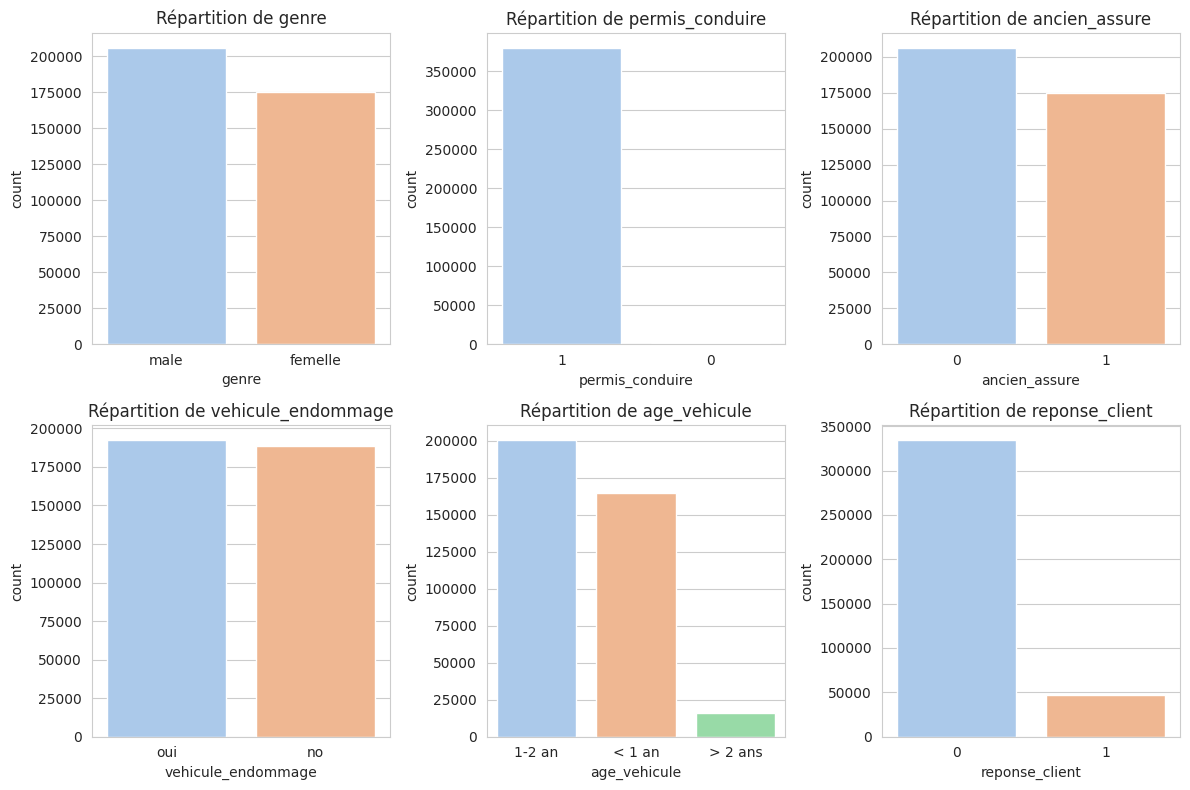

In [431]:
sns.set_style("whitegrid")
cat_vars = ["genre", "permis_conduire", "ancien_assure", "vehicule_endommage", "age_vehicule" , "reponse_client"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df_train_info[col], palette="pastel", order=df_train_info[col].value_counts().index)
    plt.title(f"Répartition de {col}")

plt.tight_layout()
plt.show()


interpretation:

Genre : Il y a légèrement plus d’hommes que de femmes dans l’échantillon.

Permis de conduire : La totalité des clients possède un permis.

Ancien assuré : Il y a plus de nouveaux clients que d’anciens assurés.

Véhicule endommagé : La répartition entre véhicules endommagés et non endommagés est équilibrée.

Âge du véhicule : La majorité des véhicules ont entre 1 et 2 ans, et très peu ont plus de 2 ans.

Réponse client : La grande majorité des clients n’a pas souscrit à l’offre proposée.



<ipython-input-432-adda50364914>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train_info["reponse_client"], palette="coolwarm")


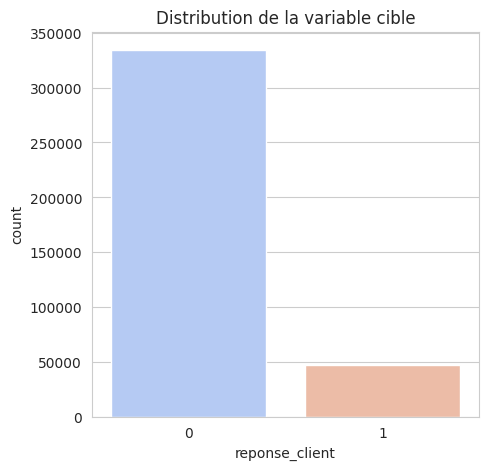

reponse_client
0    0.877437
1    0.122563
Name: proportion, dtype: float64


In [432]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_train_info["reponse_client"], palette="coolwarm")
plt.title("Distribution de la variable cible")
plt.show()
print(df_train_info["reponse_client"].value_counts(normalize=True))


La variable cible est déséquilibrée, avec une majorité de clients n’ayant pas souscrit (classe 0) par rapport à ceux ayant souscrit (classe 1).

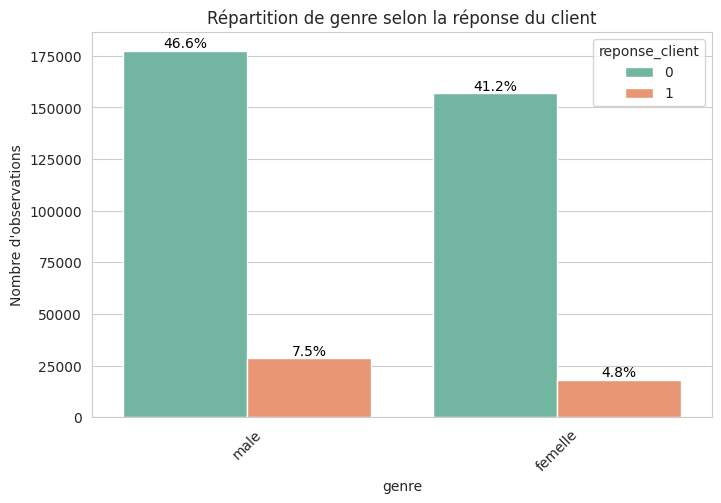

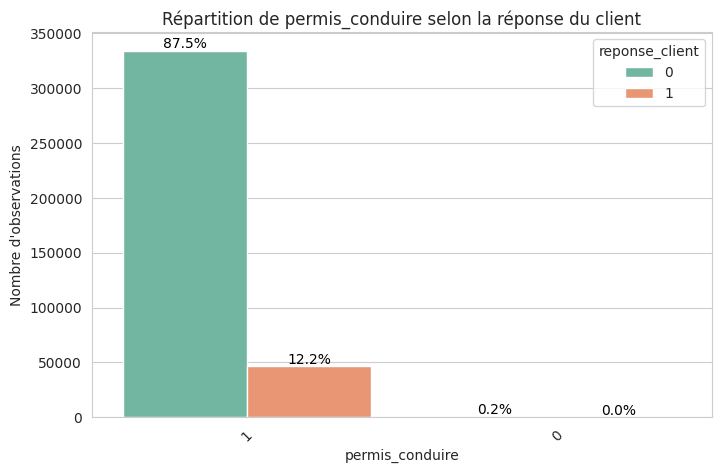

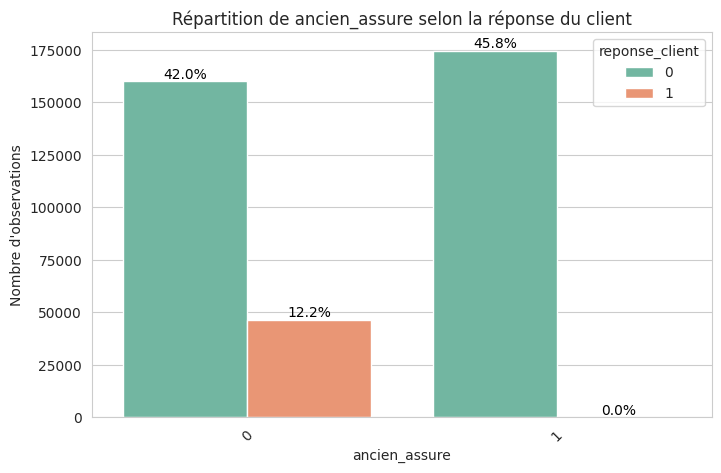

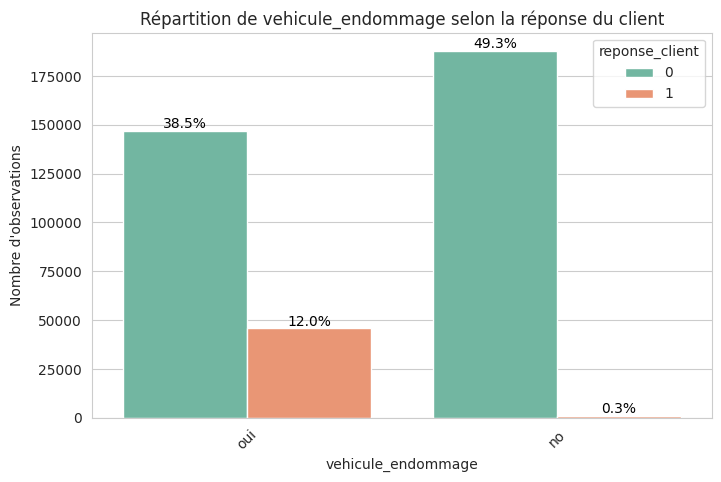

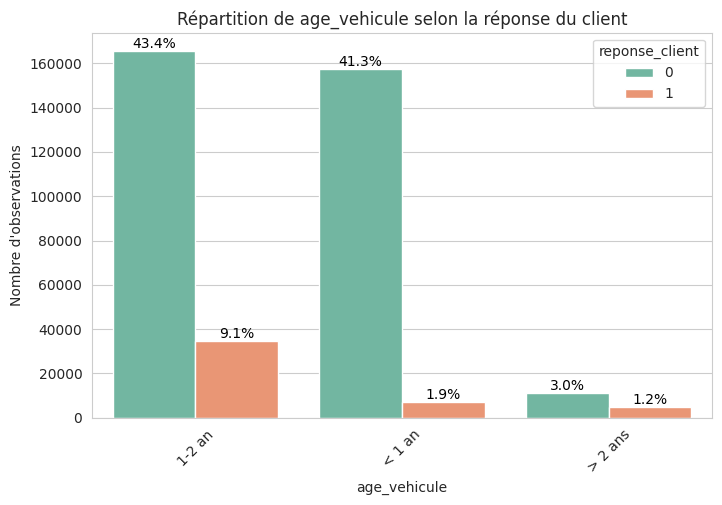

In [433]:
cat_vars = ["genre", "permis_conduire", "ancien_assure", "vehicule_endommage", "age_vehicule"]  # Ajout de age_vehicule
for var in cat_vars:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=df_train_info[var], hue=df_train_info["reponse_client"], palette="Set2",
                        order=df_train_info[var].value_counts().index)  # Trier par fréquence

    total = len(df_train_info)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Répartition de {var} selon la réponse du client")
    plt.xlabel(var)
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=45)
    plt.show()


**Visualisation des données quantitatives**

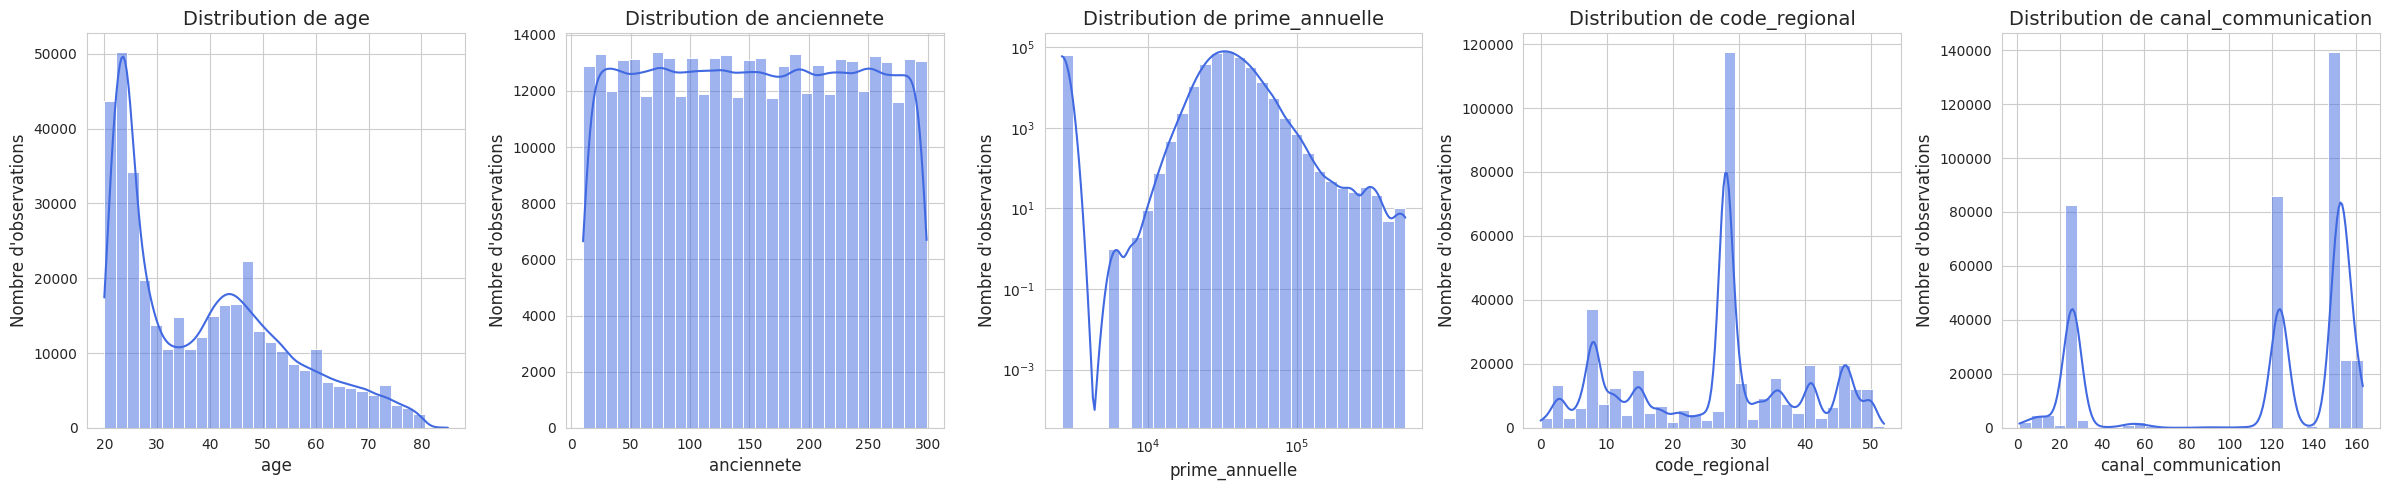

In [434]:
variables = ['age', 'anciennete', 'prime_annuelle', 'code_regional', 'canal_communication']  # Ajout de code_regional
plt.figure(figsize=(24, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 5, i)
    if var == 'prime_annuelle':
        sns.histplot(data=df_train_info, x=var, kde=True, bins=30, color='royalblue', log_scale=True)
        plt.yscale('log')
    else:
        sns.histplot(data=df_train_info, x=var, kde=True, bins=30, color='royalblue')

    plt.title(f'Distribution de {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Nombre d\'observations', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()


interpretation :

Âge : La majorité des clients ont entre 18 et 30 ans, avec une diminution progressive après 40 ans.

Ancienneté : Les valeurs sont relativement uniformes, indiquant une bonne répartition des clients selon l’ancienneté.

Prime annuelle : La distribution est très étalée et asymétrique, avec de nombreuses primes faibles et quelques valeurs très élevées (présence d’outliers).

Code régional : Certains codes régionaux sont surreprésentés (notamment autour de 30), ce qui peut refléter des zones géographiques très peuplées.

Canal de communication : Certains canaux (autour de 20, 120 et 150) sont utilisés de manière beaucoup plus fréquente, ce qui suggère un biais de communication de l’entreprise.

<ipython-input-435-4dc3b24e9ac6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_train_info[col], palette="pastel")
<ipython-input-435-4dc3b24e9ac6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_train_info[col], palette="pastel")
<ipython-input-435-4dc3b24e9ac6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_train_info[col], palette="pastel")
<ipython-input-435-4dc3b24e9ac6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

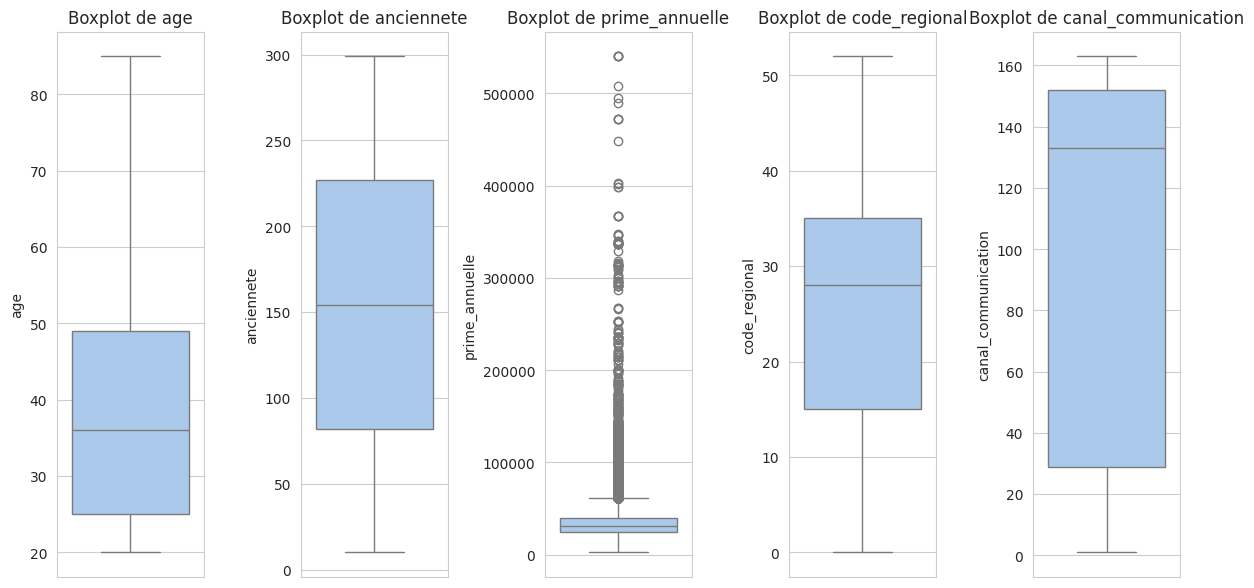

In [435]:
num_vars = ['age', 'anciennete', 'prime_annuelle', 'code_regional', 'canal_communication']
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_vars, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df_train_info[col], palette="pastel")
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


Age
-> La majorité des clients ont entre 30 et 50 ans, sans valeurs aberrantes visibles, ce qui indique une répartition relativement normale.
Ancienneté
-> La plupart des clients sont inscrits depuis moins de 300 jours, avec une médiane autour de 150 jours, montrant une certaine homogénéité.

Prime annuelle
-> La distribution est très asymétrique avec des valeurs extrêmes atteignant 500 000, ce qui peut nécessiter un traitement des outliers.

Code régional
->  Les clients sont répartis sur plusieurs régions, mais certaines sont nettement plus représentées, ce qui pourrait influencer la souscription.

Canal de communication
->  La variabilité est élevée, avec un canal de communication dominant, suggérant qu’une analyse plus approfondie pourrait révéler son impact sur la décision des clients.


In [436]:
import numpy as np

# Calcul des quartiles
Q1 = df_train_info["prime_annuelle"].quantile(0.25)
Q3 = df_train_info["prime_annuelle"].quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Suppression des valeurs aberrantes
df_train_info_filtered = df_train_info[
    (df_train_info["prime_annuelle"] >= lower_bound) &
    (df_train_info["prime_annuelle"] <= upper_bound)
]

print(f"Taille du dataset avant suppression : {df_train_info.shape[0]}")
print(f"Taille du dataset après suppression : {df_train_info_filtered.shape[0]}")


Taille du dataset avant suppression : 381109
Taille du dataset après suppression : 370789


-> Le pourcentage de données supprimées est 2,71% < 5% donc on peux supprimé ces ligne

<ipython-input-437-10b33e2b3b8f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned[col], palette="pastel")
<ipython-input-437-10b33e2b3b8f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned[col], palette="pastel")
<ipython-input-437-10b33e2b3b8f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned[col], palette="pastel")
<ipython-input-437-10b33e2b3b8f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

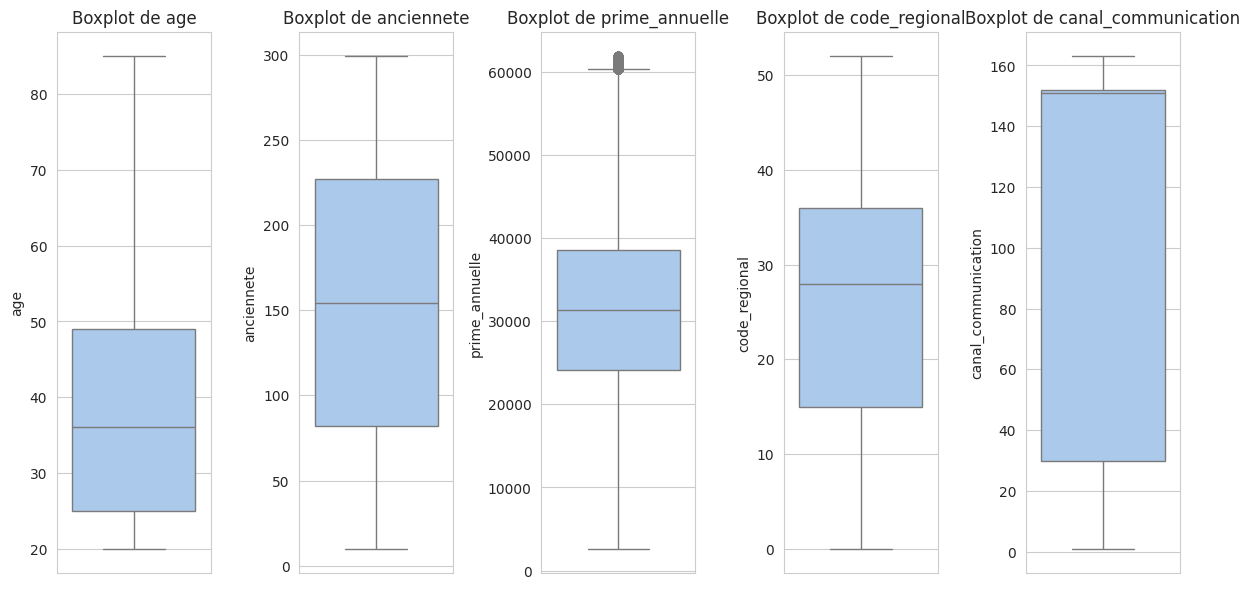

In [437]:


def remove_outliers(df_train_info, columns):
    df_clean = df_train_info.copy()
    for col in columns:
        Q1 = df_train_info[col].quantile(0.25)
        Q3 = df_train_info[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

num_vars = ['age', 'anciennete', 'prime_annuelle', 'code_regional', 'canal_communication']
df_cleaned = remove_outliers(df_train_info, num_vars)
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_vars, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df_cleaned[col], palette="pastel")
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()



KDE plots

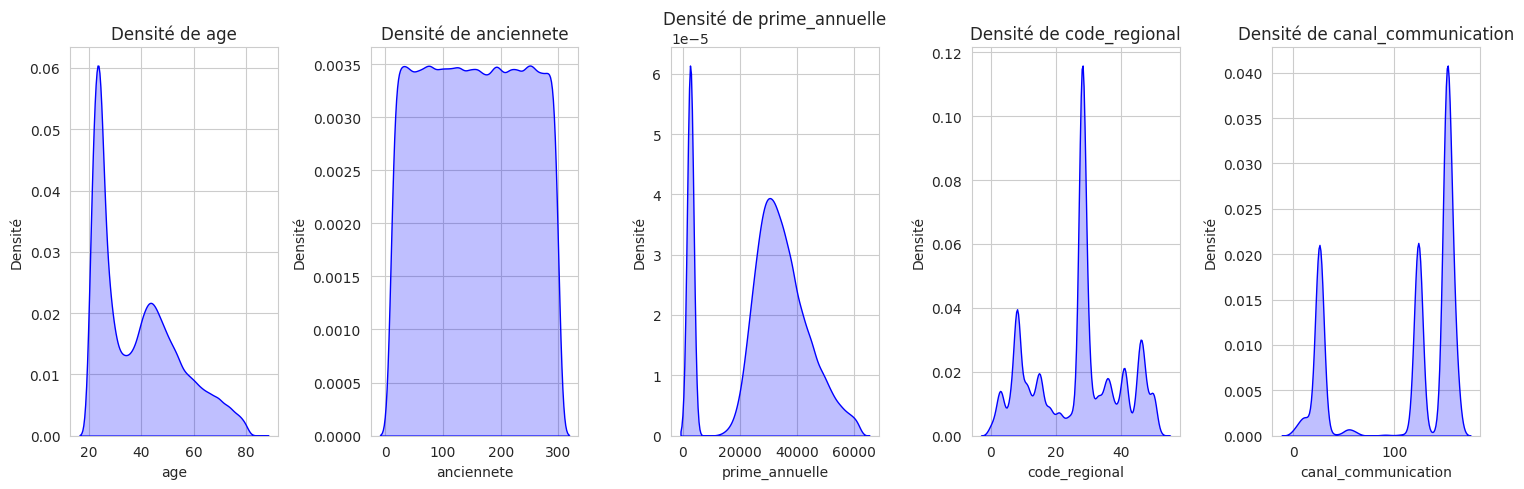

In [438]:
num_vars = ['age', 'anciennete', 'prime_annuelle', 'code_regional', 'canal_communication']
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_vars, 1):
    plt.subplot(1, 5, i)
    sns.kdeplot(df_cleaned[col], fill=True, color="blue")
    plt.title(f"Densité de {col}")
    plt.xlabel(col)
    plt.ylabel("Densité")

plt.tight_layout()
plt.show()


interpretation:

Âge : La densité est fortement concentrée entre 18 et 30 ans, avec un second pic autour de 40 ans — les jeunes adultes sont donc majoritaires.

Ancienneté : Distribution presque uniforme, ce qui indique une diversité constante des durées d’adhésion parmi les clients.

Prime annuelle : Distribution très asymétrique, avec de nombreuses petites primes et quelques grandes valeurs (longue traîne).

Code régional : Certains codes (vers 30) ont une densité très élevée, ce qui reflète des zones géographiques très représentées.

Canal de communication : Quelques canaux sont massivement utilisés (pics nets autour de 20, 120 et 150), montrant une forte dépendance à certains moyens de contact.

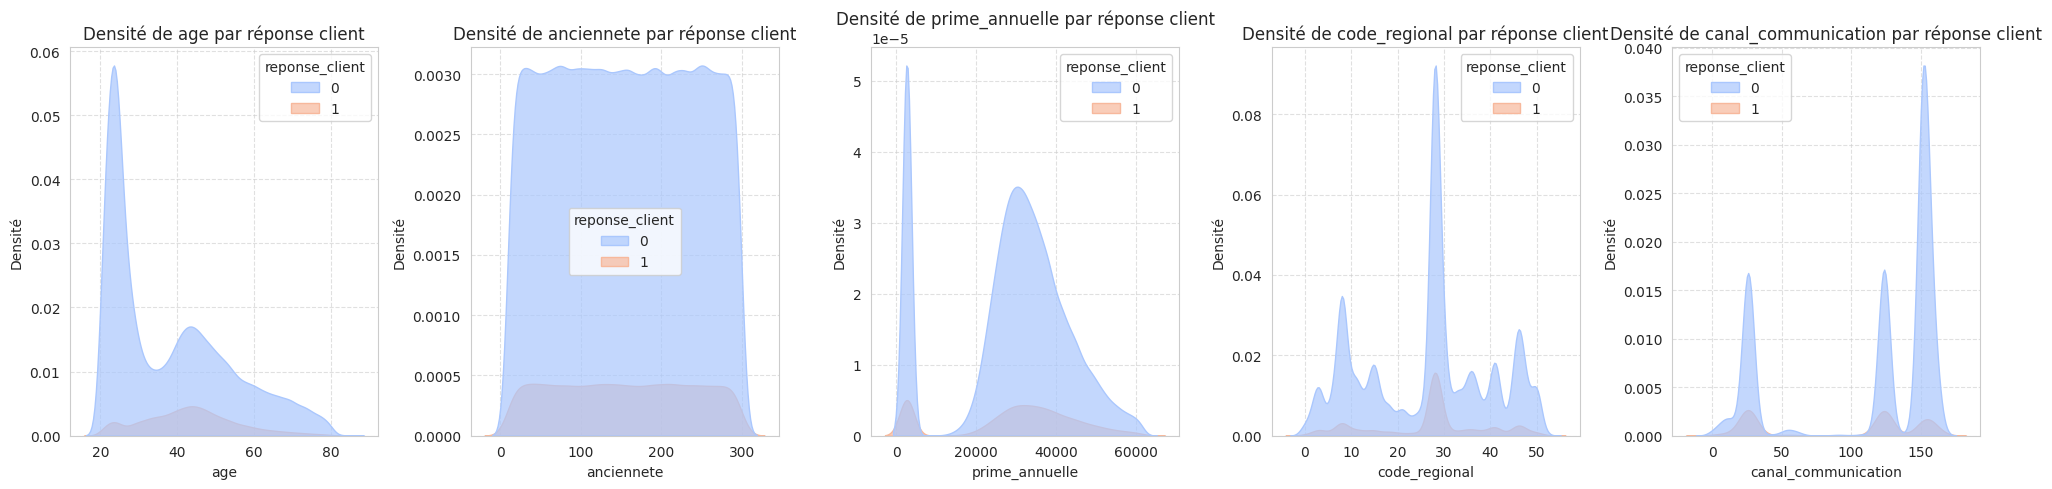

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns

num_vars = ["age", "anciennete", "prime_annuelle", "code_regional", "canal_communication"]
plt.figure(figsize=(len(num_vars) * 4, 5))

palette = sns.color_palette("coolwarm", as_cmap=True)
for i, col in enumerate(num_vars, 1):
    plt.subplot(1, len(num_vars), i)
    sns.kdeplot(data=df_cleaned, x=col, hue="reponse_client", fill=True, palette="coolwarm", alpha=0.7)
    plt.title(f"Densité de {col} par réponse client", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Densité", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


 interpretation:

- Densité de l’âge par réponse client: Les jeunes clients (entre 20 et 30 ans) sont plus nombreux à souscrire (courbe orange plus visible) par rapport aux autres tranches d’âge.

- Densité de l’ancienneté par réponse client: Les clients ayant une faible ancienneté (< 100 jours) sont un peu plus enclins à souscrire que les autres.

-Densité de la prime annuelle par réponse client: Les clients ayant une prime modérée (autour de 20 000–40 000) semblent plus susceptibles de répondre positivement, même si la majorité reste neutre.

- Densité du code régional par réponse client: Certains codes régionaux présentent de légers pics de souscription (légère différence de densité entre orange et bleu), ce qui peut indiquer un effet local.

- Densité du canal de communication par réponse client: Quelques canaux spécifiques montrent une meilleure réponse client (pics orange), suggérant que certains moyens de communication sont plus efficaces.

**Analyse de corrélation**

In [440]:
df_encoded = df_cleaned.copy()
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
print(df_encoded.dtypes)


id_client                int64
genre                    int64
age                      int64
permis_conduire          int64
code_regional          float64
ancien_assure            int64
age_vehicule             int64
vehicule_endommage       int64
prime_annuelle         float64
canal_communication    float64
anciennete               int64
reponse_client           int64
dtype: object


In [441]:
df_encoded

,id_client,genre,age,permis_conduire,code_regional,ancien_assure,age_vehicule,vehicule_endommage,prime_annuelle,canal_communication,anciennete,reponse_client
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


📊 Matrice des corrélations fortes (|ρ| ≥ 0.5) :
                     id_client  genre       age  permis_conduire  \
id_client                  1.0    NaN       NaN              NaN   
genre                      NaN    1.0       NaN              NaN   
age                        NaN    NaN  1.000000              NaN   
permis_conduire            NaN    NaN       NaN              1.0   
code_regional              NaN    NaN       NaN              NaN   
ancien_assure              NaN    NaN       NaN              NaN   
age_vehicule               NaN    NaN -0.660567              NaN   
vehicule_endommage         NaN    NaN       NaN              NaN   
prime_annuelle             NaN    NaN       NaN              NaN   
canal_communication        NaN    NaN -0.645866              NaN   
anciennete                 NaN    NaN       NaN              NaN   
reponse_client             NaN    NaN       NaN              NaN   

                     code_regional  ancien_assure  age_vehicule  \


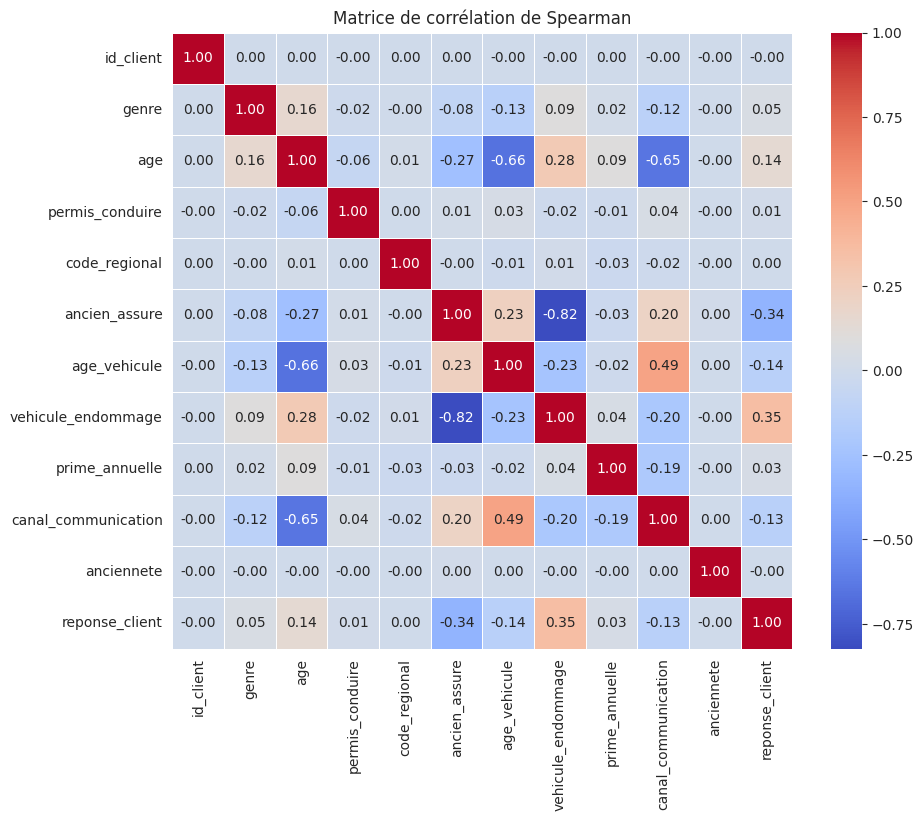

In [442]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_encoded.corr(method='spearman')
strong_correlations = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]
print("📊 Matrice des corrélations fortes (|ρ| ≥ 0.5) :")
print(strong_correlations)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation de Spearman")
plt.show()


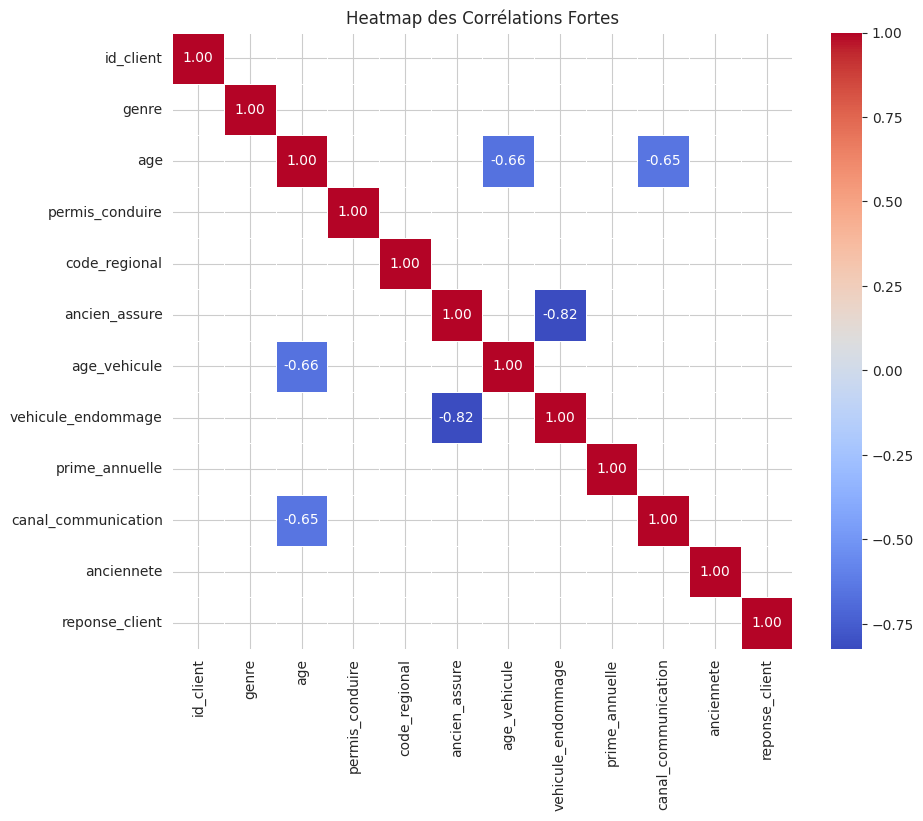

In [443]:
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap des Corrélations Fortes")
plt.show()




**Relation entre l’âge et l’ancienneté du véhicule (ρ = -0.66):**
les conducteurs plus jeunes possèdent plus souvent des véhicules récents.
À l’inverse, les conducteurs plus âgés tendent à conserver leur véhicule plus longtemps.

**-Relation entre l’âge et le canal de communication (ρ = -0.65):**
les préférences en matière de communication dépendent de l’âge du client.  Les clients plus jeunes et plus âgés pourraient avoir des préférences distinctes par exp  digital vs téléphone.

**Relation entre "Ancien Assuré" et "Véhicule Endommagé" (ρ = -0.82):**
Les clients ayant une assurance depuis longtemps ont moins de véhicules endommagés. Cela pourrait suggérer que les assurés fidèles entretiennent mieux leur véhicule.

**Relations entre les colonnes**

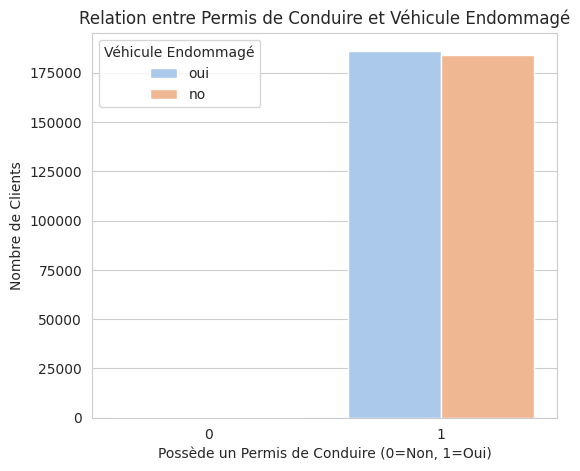

In [444]:
plt.figure(figsize=(6, 5))
sns.countplot(x=df_cleaned['permis_conduire'], hue=df_cleaned['vehicule_endommage'], palette="pastel")
plt.title("Relation entre Permis de Conduire et Véhicule Endommagé")
plt.xlabel("Possède un Permis de Conduire (0=Non, 1=Oui)")
plt.ylabel("Nombre de Clients")
plt.legend(title="Véhicule Endommagé")
plt.show()


=> il n’y a aucune personne sans permis (0), donc nous ne pouvons pas comparer les proportions de véhicules endommagés entre ceux avec et sans permis.

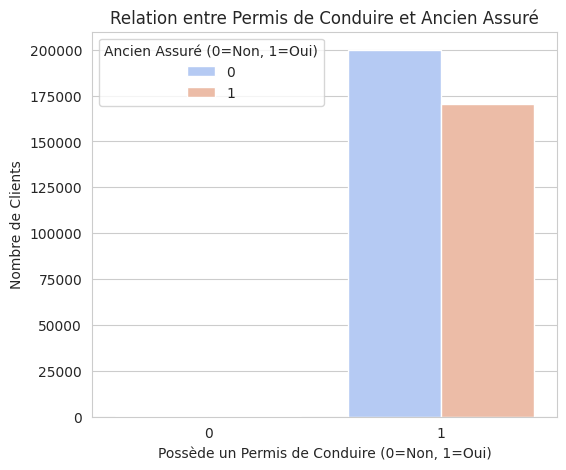

In [445]:
plt.figure(figsize=(6, 5))
sns.countplot(x=df_cleaned['permis_conduire'], hue=df_cleaned['ancien_assure'], palette="coolwarm")
plt.title("Relation entre Permis de Conduire et Ancien Assuré")
plt.xlabel("Possède un Permis de Conduire (0=Non, 1=Oui)")
plt.ylabel("Nombre de Clients")
plt.legend(title="Ancien Assuré (0=Non, 1=Oui)")
plt.show()

=> Parmi ceux qui ont un permis (1) Une majorité ne sont pas d'anciens assurés





<ipython-input-446-8f809064f36b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['age_vehicule'], y=df_cleaned['age'], palette="pastel")


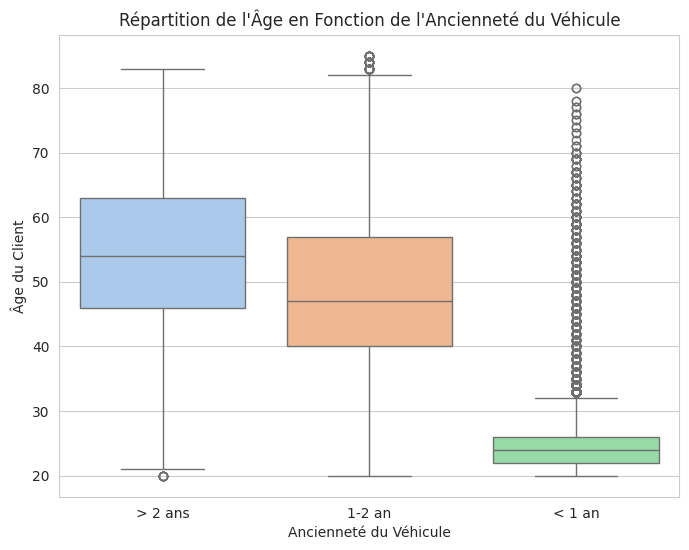

In [446]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['age_vehicule'], y=df_cleaned['age'], palette="pastel")
plt.title("Répartition de l'Âge en Fonction de l'Ancienneté du Véhicule")
plt.xlabel("Ancienneté du Véhicule")
plt.ylabel("Âge du Client")
plt.show()


-> Permet de voir si les jeunes ont des véhicules plus récents et si les clients plus âgés gardent leurs voitures plus longtemps.



=>Il existe une relation claire entre l'ancienneté du véhicule et l’âge du client :
Plus le client est jeune, plus son véhicule est récent et  plus le client est âgé, plus il est probable qu’il conserve un véhicule ancien.

<ipython-input-447-6be87fa3792e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['reponse_client'], y=df_cleaned['age_x_age_vehicule'], palette="coolwarm")


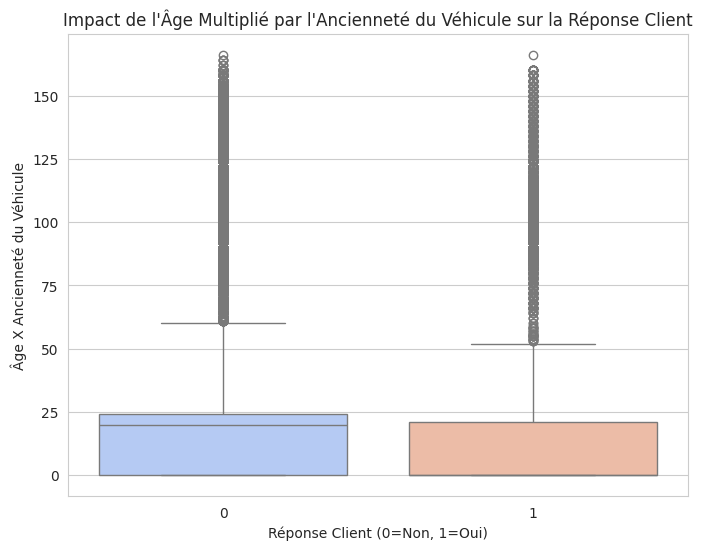

In [447]:
df_cleaned['age_x_age_vehicule'] = df_cleaned['age'] * df_cleaned['age_vehicule'].astype('category').cat.codes
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['reponse_client'], y=df_cleaned['age_x_age_vehicule'], palette="coolwarm")
plt.title("Impact de l'Âge Multiplié par l'Ancienneté du Véhicule sur la Réponse Client")
plt.xlabel("Réponse Client (0=Non, 1=Oui)")
plt.ylabel("Âge X Ancienneté du Véhicule")
plt.show()


=> Cette combinaison suggère que les clients âgés avec des véhicules plus anciens sont moins susceptibles d’accepter l’offre.
Inversement, les jeunes clients avec des véhicules récents (produit faible) sont plus réceptifs à l’offre.



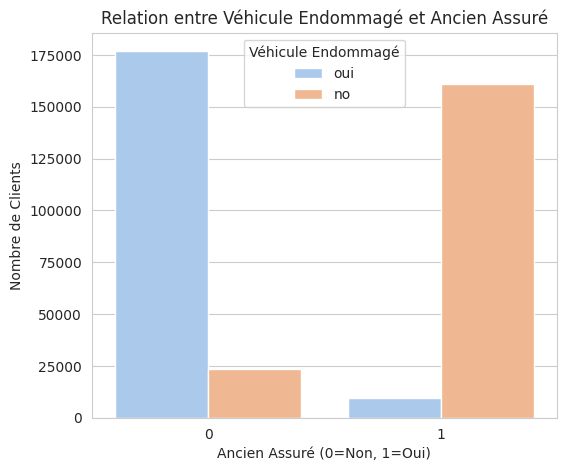

In [448]:
plt.figure(figsize=(6, 5))
sns.countplot(x=df_cleaned['ancien_assure'], hue=df_cleaned['vehicule_endommage'], palette="pastel")
plt.title("Relation entre Véhicule Endommagé et Ancien Assuré")
plt.xlabel("Ancien Assuré (0=Non, 1=Oui)")
plt.ylabel("Nombre de Clients")
plt.legend(title="Véhicule Endommagé")
plt.show()


 => Un client ayant été anciennement assuré a-t-il moins de risque d'avoir un véhicule endommagé ?

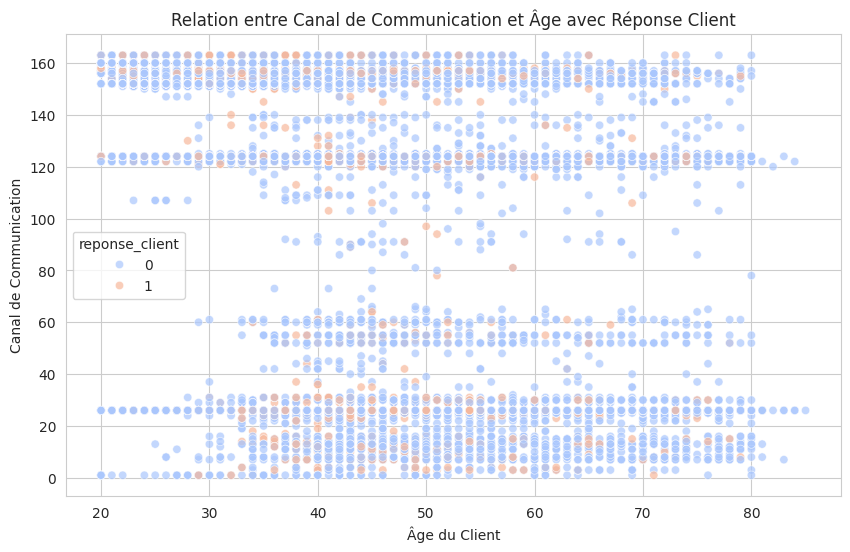

In [449]:
df_sampled = df_cleaned.sample(frac=0.1, random_state=42)  # Réduction de l'échantillon
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_sampled['age'], y=df_sampled['canal_communication'], hue=df_sampled['reponse_client'], palette="coolwarm", alpha=0.7)
plt.title("Relation entre Canal de Communication et Âge avec Réponse Client")
plt.xlabel("Âge du Client")
plt.ylabel("Canal de Communication")
plt.show()


 => PCette combinaison suggère que les clients d’âge intermédiaire (environ 30 à 60 ans) utilisant certains canaux spécifiques (en particulier ceux près du canal 0) sont plus réceptifs à l'offre. À l'inverse, les canaux de communication supérieurs (vers 160) semblent globalement moins efficaces, surtout auprès des groupes d'âge extrêmes (très jeunes ou seniors).

<ipython-input-450-ab8f35cb6cc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['age_vehicule'], y=df_cleaned['canal_communication'], palette="pastel")


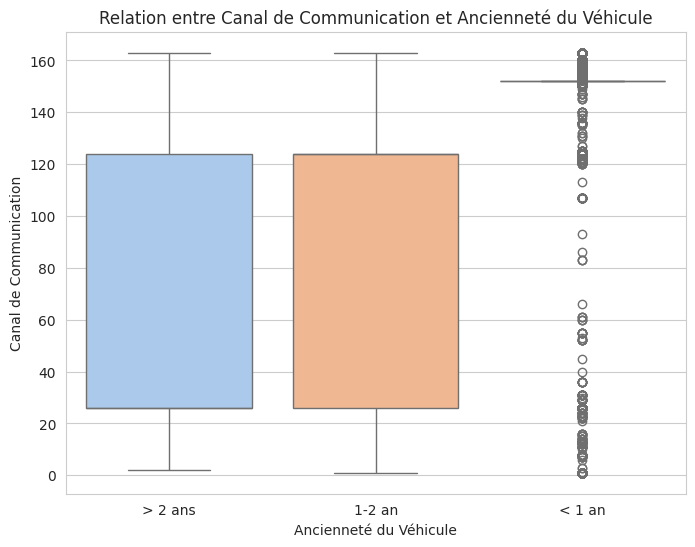

In [450]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['age_vehicule'], y=df_cleaned['canal_communication'], palette="pastel")
plt.title("Relation entre Canal de Communication et Ancienneté du Véhicule")
plt.xlabel("Ancienneté du Véhicule")
plt.ylabel("Canal de Communication")
plt.show()


=> Ce graphique indique que les véhicules très récents utilisent une plus large gamme de canaux, tandis que les véhicules plus anciens ont une utilisation plus homogène.
 Cela peut révéler que les propriétaires de vieux véhicules préfèrent des méthodes de communication plus traditionnelles.

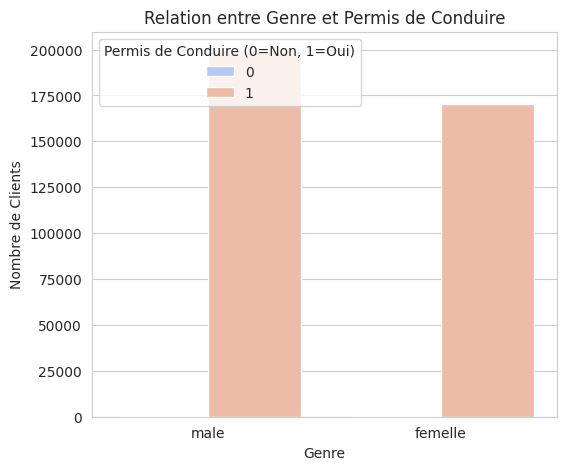

In [451]:
plt.figure(figsize=(6, 5))
sns.countplot(x=df_cleaned['genre'], hue=df_cleaned['permis_conduire'], palette="coolwarm")
plt.title("Relation entre Genre et Permis de Conduire")
plt.xlabel("Genre")
plt.ylabel("Nombre de Clients")
plt.legend(title="Permis de Conduire (0=Non, 1=Oui)")
plt.show()


=>La majorité des clients, hommes comme femmes, possèdent un permis de conduire. Les hommes sont légèrement plus nombreux dans l'échantillon.









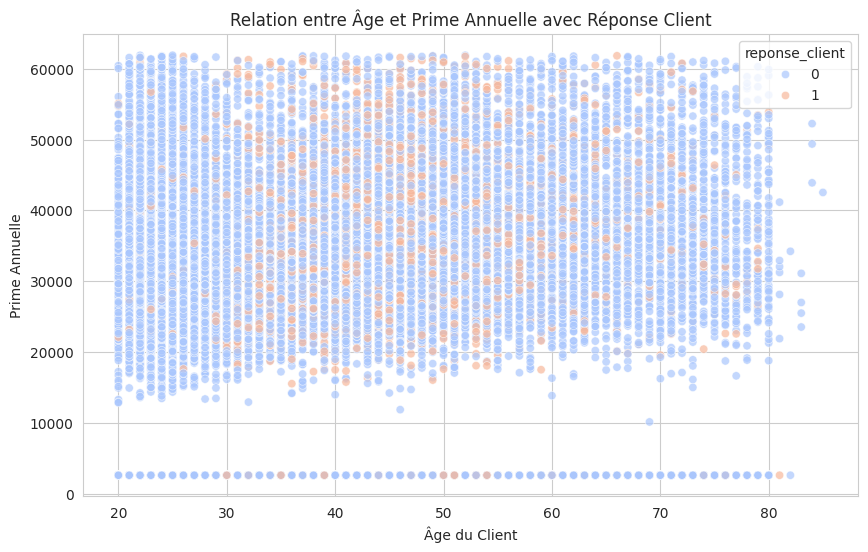

In [452]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_sampled['age'], y=df_sampled['prime_annuelle'], hue=df_sampled['reponse_client'], palette="coolwarm", alpha=0.7)
plt.title("Relation entre Âge et Prime Annuelle avec Réponse Client")
plt.xlabel("Âge du Client")
plt.ylabel("Prime Annuelle")
plt.show()


=>Peut révéler si les personnes âgées paient des primes plus élevées et comment cela influence leur décision de souscrire à l’assurance.

<ipython-input-453-2de3860f96e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train_info["reponse_client"], palette="coolwarm")


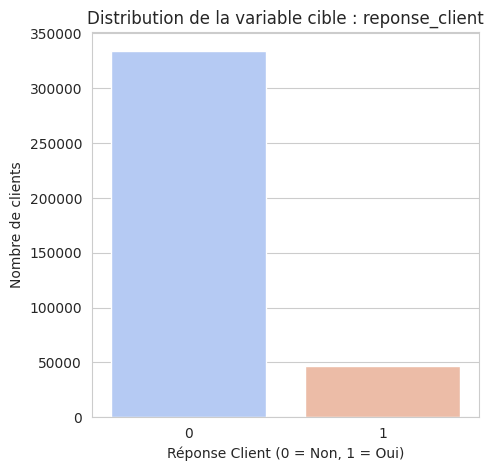

Répartition en % :
reponse_client
0    87.743664
1    12.256336
Name: proportion, dtype: float64


In [453]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_train_info["reponse_client"], palette="coolwarm")
plt.title("Distribution de la variable cible : reponse_client")
plt.xlabel("Réponse Client (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de clients")
plt.show()
distribution = df_train_info["reponse_client"].value_counts(normalize=True) * 100
print("Répartition en % :")
print(distribution)


->La variable cible est fortement déséquilibrée, Cela implique un traitement adapté lors de la modélisation

**Transformation de variables (Feature Engineering)**


In [454]:
df_train_info

,id_client,genre,age,permis_conduire,code_regional,ancien_assure,age_vehicule,vehicule_endommage,prime_annuelle,canal_communication,anciennete,reponse_client
0,1,male,44,1,28.0,0,> 2 ans,oui,40454.0,26.0,217,1
1,2,male,76,1,3.0,0,1-2 an,no,33536.0,26.0,183,0
2,3,male,47,1,28.0,0,> 2 ans,oui,38294.0,26.0,27,1
3,4,male,21,1,11.0,1,< 1 an,no,28619.0,152.0,203,0
4,5,femelle,29,1,41.0,1,< 1 an,no,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,male,74,1,26.0,1,1-2 an,no,30170.0,26.0,88,0
381105,381106,male,30,1,37.0,1,< 1 an,no,40016.0,152.0,131,0
381106,381107,male,21,1,30.0,1,< 1 an,no,35118.0,160.0,161,0
381107,381108,femelle,68,1,14.0,0,> 2 ans,oui,44617.0,124.0,74,0


In [455]:
print(df_train_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_client            381109 non-null  int64  
 1   genre                381109 non-null  object 
 2   age                  381109 non-null  int64  
 3   permis_conduire      381109 non-null  int64  
 4   code_regional        381109 non-null  float64
 5   ancien_assure        381109 non-null  int64  
 6   age_vehicule         381109 non-null  object 
 7   vehicule_endommage   381109 non-null  object 
 8   prime_annuelle       381109 non-null  float64
 9   canal_communication  381109 non-null  float64
 10  anciennete           381109 non-null  int64  
 11  reponse_client       381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


In [456]:
# Vérifier les valeurs uniques dans les colonnes catégorielles
print(df_train_info['genre'].unique())
print(df_train_info['permis_conduire'].unique())
print(df_train_info['ancien_assure'].unique())
print(df_train_info['age_vehicule'].unique())
print(df_train_info['vehicule_endommage'].unique())
print(df_train_info['reponse_client'].unique())



np.astype

['male' 'femelle']
[1 0]
[0 1]
['> 2 ans' '1-2 an' '< 1 an']
['oui' 'no']
[1 0]


<function astype at 0x7e013ebc10b0>

In [457]:
# Découper la variable âge en 7 tranches
df_train_info["tranche_age"] = pd.cut(df_train_info["age"], bins=7, labels=False)
df_train_info["tranche_age"] = df_train_info["tranche_age"].astype("category")


In [458]:
print(df_train_info['tranche_age'].unique())

[2, 6, 0, 3, 1, 5, 4]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]


In [459]:
df_train_info["tranche_age"] = pd.cut(df_train_info["age"], bins=7, labels=[f"Tranche{i+1}" for i in range(7)])
df_train_info["tranche_age"] = df_train_info["tranche_age"].astype("category")
df_train_info[["age", "tranche_age"]].head(10)

,age,tranche_age
0,44,Tranche3
1,76,Tranche7
2,47,Tranche3
3,21,Tranche1
4,29,Tranche1
5,24,Tranche1
6,23,Tranche1
7,56,Tranche4
8,24,Tranche1
9,32,Tranche2


In [460]:
df_train_info["tranche_age"] = pd.cut(df_train_info["age"], bins=7, labels=False).astype(int)
df_train_info["age_vehicule_code"] = df_train_info["age_vehicule"].map({'< 1 an': 0, '1-2 an': 1, '> 2 ans': 2})
df_train_info["vehicule_endommage"] = df_train_info["vehicule_endommage"].map({'no': 0, 'oui': 1})
df_train_info["ancien_assure"] = df_train_info["ancien_assure"].astype(int)

df_train_info["tranche_age_x_age_vehicule"] = df_train_info["tranche_age"] * df_train_info["age_vehicule_code"]
df_train_info["tranche_age_x_endommage"] = df_train_info["tranche_age"] * df_train_info["vehicule_endommage"]
df_train_info["tranche_age_x_ancien_assure"] = df_train_info["tranche_age"] * df_train_info["ancien_assure"]


In [461]:
df_train_info

,id_client,genre,age,permis_conduire,code_regional,ancien_assure,age_vehicule,vehicule_endommage,prime_annuelle,canal_communication,anciennete,reponse_client,tranche_age,age_vehicule_code,tranche_age_x_age_vehicule,tranche_age_x_endommage,tranche_age_x_ancien_assure
0,1,male,44,1,28.0,0,> 2 ans,1,40454.0,26.0,217,1,2,2,4,2,0
1,2,male,76,1,3.0,0,1-2 an,0,33536.0,26.0,183,0,6,1,6,0,0
2,3,male,47,1,28.0,0,> 2 ans,1,38294.0,26.0,27,1,2,2,4,2,0
3,4,male,21,1,11.0,1,< 1 an,0,28619.0,152.0,203,0,0,0,0,0,0
4,5,femelle,29,1,41.0,1,< 1 an,0,27496.0,152.0,39,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,male,74,1,26.0,1,1-2 an,0,30170.0,26.0,88,0,5,1,5,0,5
381105,381106,male,30,1,37.0,1,< 1 an,0,40016.0,152.0,131,0,1,0,0,0,1
381106,381107,male,21,1,30.0,1,< 1 an,0,35118.0,160.0,161,0,0,0,0,0,0
381107,381108,femelle,68,1,14.0,0,> 2 ans,1,44617.0,124.0,74,0,5,2,10,5,0


In [462]:
# # Conversion des colonnes avec < 10 modalités uniques en type category
# low_cardinality_cols = [col for col in df_train_info.columns if df_train_info[col].nunique() < 10]
# df_train_info[low_cardinality_cols] = df_train_info[low_cardinality_cols].astype('category')


In [463]:
df_train_info

,id_client,genre,age,permis_conduire,code_regional,ancien_assure,age_vehicule,vehicule_endommage,prime_annuelle,canal_communication,anciennete,reponse_client,tranche_age,age_vehicule_code,tranche_age_x_age_vehicule,tranche_age_x_endommage,tranche_age_x_ancien_assure
0,1,male,44,1,28.0,0,> 2 ans,1,40454.0,26.0,217,1,2,2,4,2,0
1,2,male,76,1,3.0,0,1-2 an,0,33536.0,26.0,183,0,6,1,6,0,0
2,3,male,47,1,28.0,0,> 2 ans,1,38294.0,26.0,27,1,2,2,4,2,0
3,4,male,21,1,11.0,1,< 1 an,0,28619.0,152.0,203,0,0,0,0,0,0
4,5,femelle,29,1,41.0,1,< 1 an,0,27496.0,152.0,39,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,male,74,1,26.0,1,1-2 an,0,30170.0,26.0,88,0,5,1,5,0,5
381105,381106,male,30,1,37.0,1,< 1 an,0,40016.0,152.0,131,0,1,0,0,0,1
381106,381107,male,21,1,30.0,1,< 1 an,0,35118.0,160.0,161,0,0,0,0,0,0
381107,381108,femelle,68,1,14.0,0,> 2 ans,1,44617.0,124.0,74,0,5,2,10,5,0


In [464]:
#One-hot encoding pour 'genre' et 'vehicule_endommage'
df_train_info = pd.get_dummies(df_train_info, columns=["genre", "vehicule_endommage"], drop_first=True)

# Ordinal encoding pour 'age_vehicule'
ordinal_encoder = OrdinalEncoder(categories=[['< 1 an', '1-2 an', '> 2 ans']])
df_train_info["age_vehicule_encoded"] = ordinal_encoder.fit_transform(df_train_info[["age_vehicule"]])

In [465]:
df_train_info["age_vehicule_encoded"] = df_train_info["age_vehicule_encoded"].astype(int)
df_train_info["genre_male"] = df_train_info["genre_male"].astype(int)
df_train_info["vehicule_endommage_1"] = df_train_info["vehicule_endommage_1"].astype(int)


In [466]:
df_train_info

,id_client,age,permis_conduire,code_regional,ancien_assure,age_vehicule,prime_annuelle,canal_communication,anciennete,reponse_client,tranche_age,age_vehicule_code,tranche_age_x_age_vehicule,tranche_age_x_endommage,tranche_age_x_ancien_assure,genre_male,vehicule_endommage_1,age_vehicule_encoded
0,1,44,1,28.0,0,> 2 ans,40454.0,26.0,217,1,2,2,4,2,0,1,1,2
1,2,76,1,3.0,0,1-2 an,33536.0,26.0,183,0,6,1,6,0,0,1,0,1
2,3,47,1,28.0,0,> 2 ans,38294.0,26.0,27,1,2,2,4,2,0,1,1,2
3,4,21,1,11.0,1,< 1 an,28619.0,152.0,203,0,0,0,0,0,0,1,0,0
4,5,29,1,41.0,1,< 1 an,27496.0,152.0,39,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,1-2 an,30170.0,26.0,88,0,5,1,5,0,5,1,0,1
381105,381106,30,1,37.0,1,< 1 an,40016.0,152.0,131,0,1,0,0,0,1,1,0,0
381106,381107,21,1,30.0,1,< 1 an,35118.0,160.0,161,0,0,0,0,0,0,1,0,0
381107,381108,68,1,14.0,0,> 2 ans,44617.0,124.0,74,0,5,2,10,5,0,0,1,2


In [467]:
nb_positifs = df_train_info[df_train_info["reponse_client"] == 1].shape[0]
canal_pos_counts = df_train_info[df_train_info["reponse_client"] == 1]["canal_communication"].value_counts()
region_pos_counts = df_train_info[df_train_info["reponse_client"] == 1]["code_regional"].value_counts()

canal_pos_ratio = (canal_pos_counts / nb_positifs * 100).sort_values(ascending=False)
region_pos_ratio = (region_pos_counts / nb_positifs * 100).sort_values(ascending=False)
seuils = [1, 2, 5, 10, 15, 20]
canal_seuils_count = {s: (canal_pos_ratio > s).sum() for s in seuils}
region_seuils_count = {s: (region_pos_ratio > s).sum() for s in seuils}

import pandas as pd
seuil_df = pd.DataFrame({
    "Seuil (%)": seuils,
    "Canaux sélectionnés": [canal_seuils_count[s] for s in seuils],
    "Régions sélectionnées": [region_seuils_count[s] for s in seuils]
})


In [468]:
seuil_df

,Seuil (%),Canaux sélectionnés,Régions sélectionnées
0,1,9,18
1,2,7,8
2,5,3,2
3,10,2,1
4,15,2,1
5,20,2,1


→  Utilise un seuil de 5% pour encoder canal_communication et code_regional Cela donne un bon équilibre entre réduction de complexité et richesse explicative.

In [469]:
seuil_ratio = 0.05
total_positifs = df_train_info[df_train_info["reponse_client"] == 1].shape[0]

canaux_counts = df_train_info[df_train_info["reponse_client"] == 1]["canal_communication"].value_counts()
canaux_utiles = canaux_counts[canaux_counts > seuil_ratio * total_positifs].index

# Encodage : 1 si canal utile, 0 sinon
df_train_info["canal_enc"] = df_train_info["canal_communication"].apply(lambda x: 1 if x in canaux_utiles else 0)
codes_counts = df_train_info[df_train_info["reponse_client"] == 1]["code_regional"].value_counts()
codes_utiles = codes_counts[codes_counts > seuil_ratio * total_positifs].index
df_train_info["region_enc"] = df_train_info["code_regional"].apply(lambda x: 1 if x in codes_utiles else 0)
df_train_info[["canal_communication", "canal_enc", "code_regional", "region_enc"]].head(10)


,canal_communication,canal_enc,code_regional,region_enc
0,26.0,1,28.0,1
1,26.0,1,3.0,0
2,26.0,1,28.0,1
3,152.0,1,11.0,0
4,152.0,1,41.0,0
5,160.0,0,33.0,0
6,152.0,1,11.0,0
7,26.0,1,28.0,1
8,152.0,1,3.0,0
9,152.0,1,6.0,0


In [470]:
df_train_info

,id_client,age,permis_conduire,code_regional,ancien_assure,age_vehicule,prime_annuelle,canal_communication,anciennete,reponse_client,tranche_age,age_vehicule_code,tranche_age_x_age_vehicule,tranche_age_x_endommage,tranche_age_x_ancien_assure,genre_male,vehicule_endommage_1,age_vehicule_encoded,canal_enc,region_enc
0,1,44,1,28.0,0,> 2 ans,40454.0,26.0,217,1,2,2,4,2,0,1,1,2,1,1
1,2,76,1,3.0,0,1-2 an,33536.0,26.0,183,0,6,1,6,0,0,1,0,1,1,0
2,3,47,1,28.0,0,> 2 ans,38294.0,26.0,27,1,2,2,4,2,0,1,1,2,1,1
3,4,21,1,11.0,1,< 1 an,28619.0,152.0,203,0,0,0,0,0,0,1,0,0,1,0
4,5,29,1,41.0,1,< 1 an,27496.0,152.0,39,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,1-2 an,30170.0,26.0,88,0,5,1,5,0,5,1,0,1,1,0
381105,381106,30,1,37.0,1,< 1 an,40016.0,152.0,131,0,1,0,0,0,1,1,0,0,1,0
381106,381107,21,1,30.0,1,< 1 an,35118.0,160.0,161,0,0,0,0,0,0,1,0,0,0,0
381107,381108,68,1,14.0,0,> 2 ans,44617.0,124.0,74,0,5,2,10,5,0,0,1,2,1,0


In [471]:
from sklearn.model_selection import train_test_split

features = [
    "age", "permis_conduire", "prime_annuelle", "anciennete",
    "age_vehicule_encoded", "vehicule_endommage_1", "ancien_assure",
    "tranche_age", "tranche_age_x_age_vehicule", "tranche_age_x_endommage", "tranche_age_x_ancien_assure",
    "canal_enc", "region_enc", "genre_male"
]

target = "reponse_client"

# Séparation X / y
X = df_train_info[features]
y = df_train_info[target].astype(int)

# Split train / test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Vérification
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


((304887, 14),
 (76222, 14),
 reponse_client
 0    0.877437
 1    0.122563
 Name: proportion, dtype: float64,
 reponse_client
 0    0.877437
 1    0.122563
 Name: proportion, dtype: float64)

In [472]:
X_train

,age,permis_conduire,prime_annuelle,anciennete,age_vehicule_encoded,vehicule_endommage_1,ancien_assure,tranche_age,tranche_age_x_age_vehicule,tranche_age_x_endommage,tranche_age_x_ancien_assure,canal_enc,region_enc,genre_male
274710,22,1,25455.0,203,0,1,0,0,0,0,0,1,0,1
216539,26,1,38393.0,45,0,0,1,0,0,0,0,1,1,0
78983,32,1,32118.0,35,0,1,0,1,0,1,0,0,1,0
218368,32,1,37711.0,215,0,1,0,1,0,1,0,1,0,1
307215,24,1,48706.0,222,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378816,25,1,23010.0,58,0,1,1,0,0,0,0,0,0,1
67726,69,1,31630.0,290,1,1,0,5,5,5,0,1,1,1
91744,24,1,59094.0,62,0,0,0,0,0,0,0,1,1,1
48700,40,1,28940.0,262,1,0,1,2,2,0,2,1,1,0


In [473]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

minmax_cols = ["age", "permis_conduire"]
robust_cols = ["prime_annuelle"]
standard_cols = [
    "anciennete",
    "tranche_age", "tranche_age_x_age_vehicule", "tranche_age_x_endommage",
    "tranche_age_x_ancien_assure"
]

minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

# Appliquer fit_transform sur les données d'entraînement
X_train[minmax_cols] = minmax_scaler.fit_transform(X_train[minmax_cols])
X_train[robust_cols] = robust_scaler.fit_transform(X_train[robust_cols])
X_train[standard_cols] = standard_scaler.fit_transform(X_train[standard_cols])

# Appliquer transform sur les données de test
X_test[minmax_cols] = minmax_scaler.transform(X_test[minmax_cols])
X_test[robust_cols] = robust_scaler.transform(X_test[robust_cols])
X_test[standard_cols] = standard_scaler.transform(X_test[standard_cols])

X_train.head()


,age,permis_conduire,prime_annuelle,anciennete,age_vehicule_encoded,vehicule_endommage_1,ancien_assure,tranche_age,tranche_age_x_age_vehicule,tranche_age_x_endommage,tranche_age_x_ancien_assure,canal_enc,region_enc,genre_male
274710,0.030769,1.0,-0.415027,0.580945,0,1,0,-0.951151,-0.838663,-0.672293,-0.417277,1,0,1
216539,0.092308,1.0,0.445213,-1.307422,0,0,1,-0.951151,-0.838663,-0.672293,-0.417277,1,1,0
78983,0.184615,1.0,0.027992,-1.426939,0,1,0,-0.345200,-0.838663,-0.011830,-0.417277,0,1,0
218368,0.184615,1.0,0.399867,0.724365,0,1,0,-0.345200,-0.838663,-0.011830,-0.417277,1,0,1
307215,0.061538,1.0,1.130918,0.808027,0,1,0,-0.951151,-0.838663,-0.672293,-0.417277,0,1,0


**Client_a_conatcter**




In [474]:
seuil_ratio = 0.05  # seuil à 5%
positifs = df_train_info[df_train_info["reponse_client"] == 1]

canaux_utiles = (
    (positifs["canal_communication"].value_counts(normalize=True) > seuil_ratio)
    .loc[lambda s: s].index.tolist()
)
regions_utiles = (
    (positifs["code_regional"].value_counts(normalize=True) > seuil_ratio)
    .loc[lambda s: s].index.tolist()
)


In [475]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OrdinalEncoder

def transformer_clients(df_clients, minmax_scaler, robust_scaler, standard_scaler,
                        canaux_utiles, regions_utiles, ordinal_encoder):

    df_clients["tranche_age"] = pd.cut(df_clients["age"], bins=7, labels=False).astype(int)

    df_clients["age_vehicule_encoded"] = ordinal_encoder.transform(df_clients[["age_vehicule"]])
    df_clients["vehicule_endommage_1"] = df_clients["vehicule_endommage"].map({'no': 0, 'oui': 1})
    df_clients["ancien_assure"] = df_clients["ancien_assure"].astype(int)

    df_clients = pd.get_dummies(df_clients, columns=["genre"], drop_first=True)
    if "genre_male" not in df_clients.columns:
        df_clients["genre_male"] = 0

    df_clients["canal_enc"] = df_clients["canal_communication"].apply(lambda x: 1 if x in canaux_utiles else 0)
    df_clients["region_enc"] = df_clients["code_regional"].apply(lambda x: 1 if x in regions_utiles else 0)

    df_clients["tranche_age_x_age_vehicule"] = df_clients["tranche_age"] * df_clients["age_vehicule_encoded"]
    df_clients["tranche_age_x_endommage"] = df_clients["tranche_age"] * df_clients["vehicule_endommage_1"]
    df_clients["tranche_age_x_ancien_assure"] = df_clients["tranche_age"] * df_clients["ancien_assure"]

    minmax_cols = ["age", "permis_conduire"]
    robust_cols = ["prime_annuelle"]
    standard_cols = [
        "anciennete", "tranche_age",
        "tranche_age_x_age_vehicule", "tranche_age_x_endommage", "tranche_age_x_ancien_assure"
    ]

    df_clients[minmax_cols] = minmax_scaler.transform(df_clients[minmax_cols])
    df_clients[robust_cols] = robust_scaler.transform(df_clients[robust_cols])
    df_clients[standard_cols] = standard_scaler.transform(df_clients[standard_cols])

    features = [
        "age", "permis_conduire", "prime_annuelle", "anciennete",
        "age_vehicule_encoded", "vehicule_endommage_1", "ancien_assure",
        "tranche_age", "tranche_age_x_age_vehicule", "tranche_age_x_endommage", "tranche_age_x_ancien_assure",
        "canal_enc", "region_enc", "genre_male"
    ]
    return df_clients[features]


In [476]:
X_clients = transformer_clients(
    df_clients=df_clients_a_contacter,
    minmax_scaler=minmax_scaler,
    robust_scaler=robust_scaler,
    standard_scaler=standard_scaler,
    canaux_utiles=canaux_utiles,
    regions_utiles=regions_utiles,
    ordinal_encoder=ordinal_encoder
)


In [477]:
X_clients

,age,permis_conduire,prime_annuelle,anciennete,age_vehicule_encoded,vehicule_endommage_1,ancien_assure,tranche_age,tranche_age_x_age_vehicule,tranche_age_x_endommage,tranche_age_x_ancien_assure,canal_enc,region_enc,genre_male
0,0.076923,1.0,0.271875,-1.211808,0.0,0,1,-0.951151,-0.838663,-0.672293,-0.417277,1,0,True
1,0.307692,1.0,0.137301,-0.518610,1.0,1,0,0.260751,0.169407,0.648633,-0.417277,0,1,True
2,0.415385,1.0,0.555386,0.533138,1.0,1,0,0.260751,0.169407,0.648633,-0.417277,1,1,True
3,0.061538,1.0,0.376263,0.389718,0.0,1,1,-0.951151,-0.838663,-0.672293,-0.417277,1,0,True
4,0.107692,1.0,1.821809,1.704404,0.0,0,1,-0.951151,-0.838663,-0.672293,-0.417277,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,0.092308,1.0,-0.055186,-1.175953,0.0,0,1,-0.951151,-0.838663,-0.672293,-0.417277,1,0,False
127033,0.276923,1.0,-0.199269,0.126781,1.0,1,0,-0.345200,-0.334628,-0.011830,-0.417277,0,1,False
127034,0.015385,1.0,-0.125997,-0.960823,0.0,0,1,-0.951151,-0.838663,-0.672293,-0.417277,1,0,True
127035,0.784615,1.0,2.073005,1.321950,1.0,0,1,2.078604,1.681511,-0.672293,3.705501,1,1,True


In [478]:
X_train

,age,permis_conduire,prime_annuelle,anciennete,age_vehicule_encoded,vehicule_endommage_1,ancien_assure,tranche_age,tranche_age_x_age_vehicule,tranche_age_x_endommage,tranche_age_x_ancien_assure,canal_enc,region_enc,genre_male
274710,0.030769,1.0,-0.415027,0.580945,0,1,0,-0.951151,-0.838663,-0.672293,-0.417277,1,0,1
216539,0.092308,1.0,0.445213,-1.307422,0,0,1,-0.951151,-0.838663,-0.672293,-0.417277,1,1,0
78983,0.184615,1.0,0.027992,-1.426939,0,1,0,-0.345200,-0.838663,-0.011830,-0.417277,0,1,0
218368,0.184615,1.0,0.399867,0.724365,0,1,0,-0.345200,-0.838663,-0.011830,-0.417277,1,0,1
307215,0.061538,1.0,1.130918,0.808027,0,1,0,-0.951151,-0.838663,-0.672293,-0.417277,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378816,0.076923,1.0,-0.577593,-1.152050,0,1,1,-0.951151,-0.838663,-0.672293,-0.417277,0,0,1
67726,0.753846,1.0,-0.004455,1.620742,1,1,0,2.078604,1.681511,2.630022,-0.417277,1,1,1
91744,0.061538,1.0,1.821609,-1.104243,0,0,0,-0.951151,-0.838663,-0.672293,-0.417277,1,1,1
48700,0.307692,1.0,-0.183311,1.286095,1,0,1,0.260751,0.169407,-0.672293,1.231834,1,1,0


# **Modélisation**

**Modèle Random Forest**

In [479]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(" Random Forest")
print("AUC :", roc_auc_score(y_test, y_proba_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



 Random Forest
AUC : 0.8077615327163737
[[63458  3422]
 [ 7838  1504]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66880
           1       0.31      0.16      0.21      9342

    accuracy                           0.85     76222
   macro avg       0.60      0.55      0.56     76222
weighted avg       0.82      0.85      0.83     76222



**Modèle XGBoost**

In [480]:
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=pos_weight
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(" XGBoost")
print("AUC :", roc_auc_score(y_test, y_proba_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:33:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost
AUC : 0.845518140121169
[[45051 21829]
 [  837  8505]]
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     66880
           1       0.28      0.91      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.79      0.61     76222
weighted avg       0.90      0.70      0.75     76222



**Grid Search sur RandomForestClassifier**

In [481]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#  d'hyperparamètres
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

# Mise en place du GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',  # on optimise l'AUC car la classe est déséquilibrée
    cv=3,                # validation croisée
    n_jobs=-1,           # parallélisation
    verbose=1
)

# Execution
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_rf = grid_search.best_estimator_

# Évaluation sur le jeu de test
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

print(" Meilleur modèle RandomForest (Grid Search)")
print("AUC :", roc_auc_score(y_test, y_proba_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


 Meilleur modèle RandomForest (Grid Search)
AUC : 0.8473799024560071
[[44606 22274]
 [  718  8624]]
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     66880
           1       0.28      0.92      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.70      0.75     76222



In [482]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=pos_weight
)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3],
    'subsample': [0.8, 1.0]
}
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
y_proba_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(" Meilleur modèle XGBoost (Grid Search)")
print("AUC :", roc_auc_score(y_test, y_proba_best_xgb))
print(confusion_matrix(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:20:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Meilleur modèle XGBoost (Grid Search)
AUC : 0.8480576013532546
[[44269 22611]
 [  677  8665]]
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     66880
           1       0.28      0.93      0.43      9342

    accuracy                           0.69     76222
   macro avg       0.63      0.79      0.61     76222
weighted avg       0.90      0.69      0.75     76222



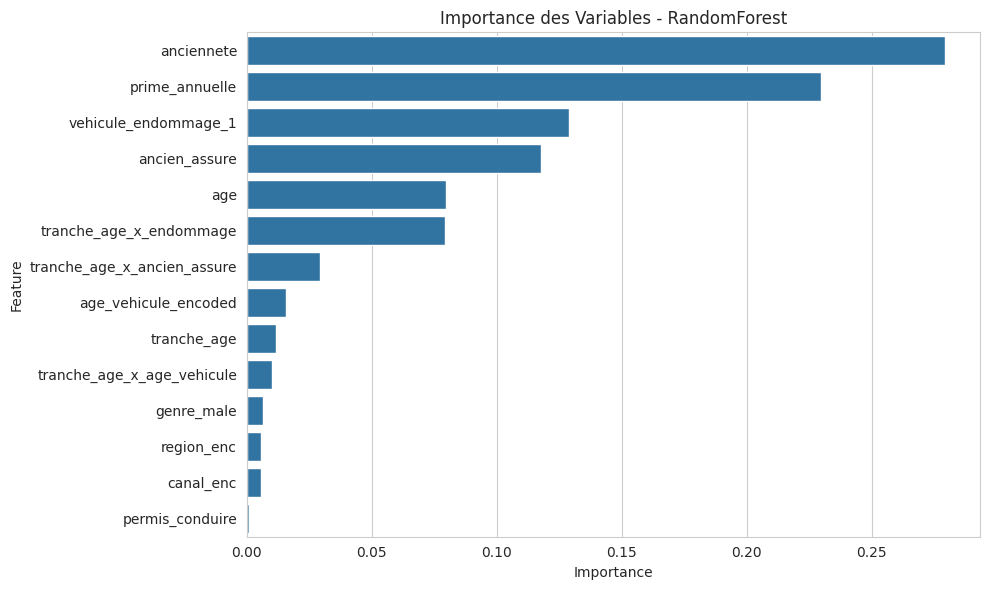

In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_  # ou best_rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Importance des Variables - RandomForest")
plt.tight_layout()
plt.show()


=>Les variables liées à l’ancienneté, la prime, le statut du véhicule, et l’historique d’assurance sont les plus prédictives.

Les interactions comme tranche_age_x_endommage sont aussi pertinentes → elles capturent des effets croisés.





In [484]:
df_clients_a_contacter["proba_souscription"] = best_rf.predict_proba(X_clients)[:, 1]

In [485]:
df_clients_a_contacter["proba_souscription"]

,proba_souscription
0,0.010698
1,0.762842
2,0.772040
3,0.094273
4,0.007260
...,...
127032,0.005872
127033,0.802542
127034,0.008581
127035,0.000582


In [486]:
df_indecis = df_clients_a_contacter[
    (df_clients_a_contacter["proba_souscription"] >= 0.4) &
    (df_clients_a_contacter["proba_souscription"] <= 0.6)
].copy()


In [487]:
df_indecis

,id_client,genre,age,permis_conduire,code_regional,ancien_assure,age_vehicule,vehicule_endommage,prime_annuelle,canal_communication,anciennete,tranche_age,age_vehicule_encoded,vehicule_endommage_1,proba_souscription
16,381126,male,25,1,24.0,0,< 1 an,oui,42660.0,152.0,207,0,0.0,1,0.541556
30,381140,femelle,70,1,8.0,0,1-2 an,oui,36804.0,124.0,256,5,1.0,1,0.544661
34,381144,femelle,24,1,24.0,0,< 1 an,oui,24096.0,152.0,270,0,0.0,1,0.455517
55,381165,male,26,1,7.0,0,< 1 an,oui,43937.0,152.0,260,0,0.0,1,0.562722
56,381166,male,23,1,28.0,0,< 1 an,oui,40715.0,156.0,45,0,0.0,1,0.529471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126976,508086,femelle,66,1,46.0,0,1-2 an,oui,27456.0,26.0,132,4,1.0,1,0.584860
126987,508097,femelle,24,1,36.0,0,< 1 an,oui,35216.0,151.0,59,0,0.0,1,0.457105
126996,508106,femelle,22,1,28.0,0,< 1 an,oui,27998.0,152.0,99,0,0.0,1,0.455456
127015,508125,male,23,1,28.0,0,< 1 an,oui,47383.0,163.0,40,0,0.0,1,0.501040


In [488]:
df_indecis[["age", "prime_annuelle", "anciennete", "proba_souscription"]].describe()




,age,prime_annuelle,anciennete,proba_souscription
count,14620.00000,14620.000000,14620.000000,14620.000000
mean,39.01751,30014.531259,156.702189,0.506816
std,22.32924,17671.988079,84.254976,0.050591
min,20.00000,2630.000000,10.000000,0.400025
25%,23.00000,23485.500000,84.000000,0.463228
50%,25.00000,31360.000000,158.000000,0.506377
75%,67.00000,39335.500000,230.000000,0.547697
max,85.00000,303339.000000,299.000000,0.599955


Les clients considérés comme "indécis" ont un profil assez hétérogène, mais on note une tendance à être :
relativement jeunes (autour de 39 ans),
avec une prime annuelle moyenne (30 000 TND),
et une ancienneté intermédiaire (5 mois).

->Ces clients présentent une probabilité de souscription proche de 0.5, ce qui en fait des cibles stratégiques pour une campagne marketing.

In [489]:
# Proportion d'assurés déjà clients
df_indecis["ancien_assure"].value_counts(normalize=True)




,proportion
ancien_assure,
0,1.0


->Tous les clients indécis n’étaient pas assurés auparavant. Cela signifie que les campagnes marketing doivent particulièrement viser les nouveaux clients, qui hésitent probablement à franchir le pas.

In [490]:
# Répartition par genre
df_indecis["genre"].value_counts(normalize=True)


,proportion
genre,
femelle,0.501436
male,0.498564


 ->Il y a une répartition parfaitement équilibrée entre hommes et femmes. Cela suggère qu’il n’est pas nécessaire d’adapter la stratégie marketing selon le genre pour cette population indécise.

In [491]:

# Répartition des tranches d'âge
pd.cut(df_indecis["age"], bins=7).value_counts(normalize=True)

,proportion
age,
"(19.935, 29.286]",0.667784
"(66.429, 75.714]",0.213475
"(75.714, 85.0]",0.066826
"(57.143, 66.429]",0.035499
"(29.286, 38.571]",0.011696
"(38.571, 47.857]",0.002941
"(47.857, 57.143]",0.001778


 ->La stratégie marketing devrait cibler prioritairement les jeunes adultes, puis les seniors hésitants.

In [492]:
df_indecis.to_csv("clients_indecis.csv", index=False)


In [493]:

df_export = pd.read_csv("clients_indecis.csv")

df_export.head()


,id_client,genre,age,permis_conduire,code_regional,ancien_assure,age_vehicule,vehicule_endommage,prime_annuelle,canal_communication,anciennete,tranche_age,age_vehicule_encoded,vehicule_endommage_1,proba_souscription
0,381126,male,25,1,24.0,0,< 1 an,oui,42660.0,152.0,207,0,0.0,1,0.541556
1,381140,femelle,70,1,8.0,0,1-2 an,oui,36804.0,124.0,256,5,1.0,1,0.544661
2,381144,femelle,24,1,24.0,0,< 1 an,oui,24096.0,152.0,270,0,0.0,1,0.455517
3,381165,male,26,1,7.0,0,< 1 an,oui,43937.0,152.0,260,0,0.0,1,0.562722
4,381166,male,23,1,28.0,0,< 1 an,oui,40715.0,156.0,45,0,0.0,1,0.529471


# Conclusion & Recommandation marketing
À l’issue de ce projet, nous avons construit un modèle prédictif performant capable d’estimer la probabilité de souscription à une offre d’assurance auto. Grâce à une analyse fine des probabilités prédites, nous avons identifié un segment de clients dits "indécis" (probabilité comprise entre 0.4 et 0.6) pour lesquels un contact marketing peut réellement influencer la décision finale.

Les profils les plus représentés parmi ces clients sont :

Des jeunes adultes (20 à 30 ans),

De nouveaux assurés,

Avec une prime moyenne de 30 000 TND,

Utilisant divers canaux de communication.

 **Recommandation** : concentrer les actions marketing sur ces profils indécis afin d’optimiser les efforts de conversion tout en réduisant les coûts liés à des contacts inefficaces.